In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
data=pd.read_csv("Concrete_Data - Sheet1.csv")

In [5]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [69]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [55]:
corr=data.corr()

<Axes: >

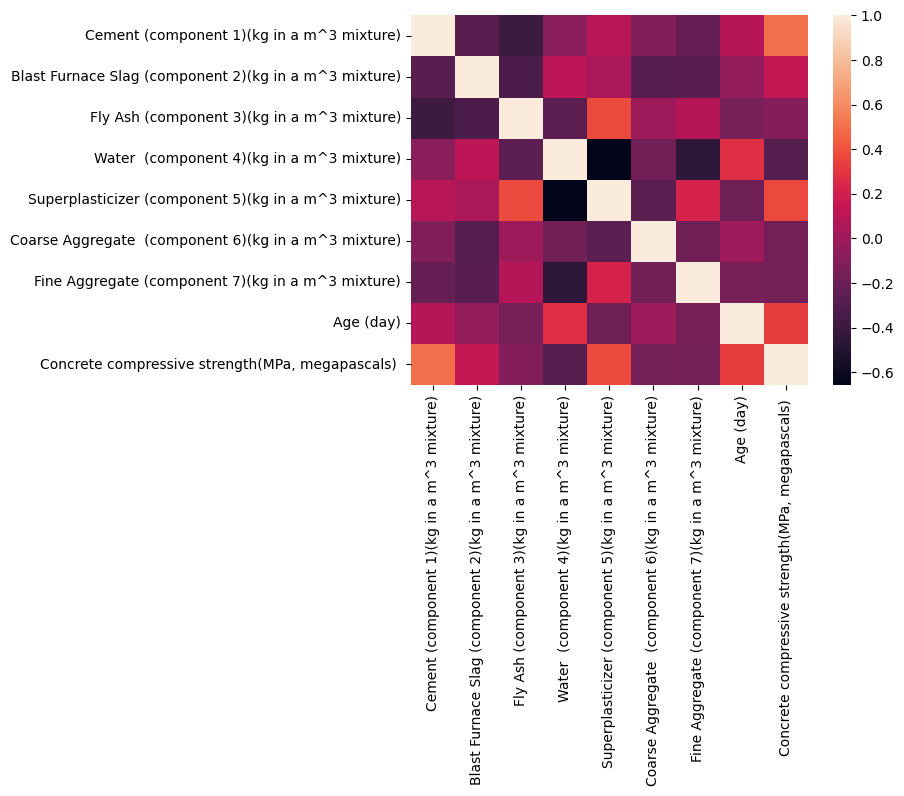

In [56]:
sns.heatmap(corr)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
SS = StandardScaler()

In [8]:
transformed_data = SS.fit_transform(data)

In [9]:
transformed_data

array([[ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  2.64540763],
       [ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  1.56142148],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -2.24091709,
         3.55306569,  0.26662698],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ...,  0.0801067 ,
        -0.27973311, -0.72572939],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.19116644,
        -0.27973311, -0.18253855],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -0.15074782,
        -0.27973311, -0.20469738]])

In [10]:
df = pd.DataFrame(transformed_data)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [12]:
X=df.iloc[:,:8]

In [13]:
X.head()

,0,1,2,3,4,5,6,7
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


In [14]:
y=df.iloc[:,-1:]

In [15]:
y.head()

,8
0,2.645408
1,1.561421
2,0.266627
3,0.313340
4,0.507979


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=104,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
LR=LinearRegression()

In [19]:
LR.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_LR = LR.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
MSE_LR = mean_squared_error(y_test,y_pred_LR)

In [23]:
MSE_LR

0.3775092588333808

In [24]:
r2_score_LR=r2_score(y_test,y_pred_LR)

In [25]:
r2_score_LR

0.6730281178193728

In [26]:
import statsmodels.api as sm

In [27]:
a=sm.OLS(y_train,X_train).fit()

In [28]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      8   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              151.1
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                   2.38e-155
Time:                        11:20:48   Log-Likelihood:                         -778.47
No. Observations:                 824   AIC:                                      1573.
Df Residuals:                     816   BIC:                                      1611.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.7669      0.060     12.795      0.000       0.649       0.885
1              0.5344      0.058      9.139      0.000       0.420       0.649
2              0.3389      0.055      6.217      0.000       0.232       0.446
3             -0.1536      0.058     -2.651      0.008      -0.267      -0.040
4              0.1113      0.037      3.013      0.003       0.039       0.184
5              0.1109      0.049      2.268      0.024       0.015       0.207
6              0.1209      0.057      2.107      0.035       0.008       0.234
7              0.4252      0.024     17.942      0.000       0.379       0.472
==============================================================================
Omnibus:                        4.283   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.122
Skew:                          -0.162   Prob(JB):                        0.127
Kurtosis:                       3.122   Cond. No.                         8.67
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
SGD = SGDRegressor()

In [45]:
#hyperparameter tuning
param_grid = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

In [46]:
grid_search=GridSearchCV(SGD,param_grid,cv=8)

In [47]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [48]:
y_predict_SD = grid_search.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
y_test_array = y_test.values.flatten()
y_pred_LR_array = y_pred_LR.flatten()

In [51]:
mean_squared_error(y_test,y_predict_SD)

0.4092131474794747

In [52]:
r2_score(y_test,y_predict_SD)

0.6455684465649688

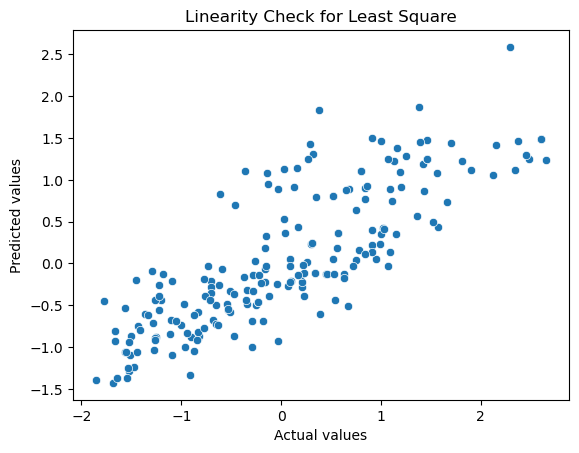

In [66]:
#Linearity Check
sns.scatterplot(x=y_test_array, y=y_pred_LR_array)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linearity Check for Least Square')
plt.show()

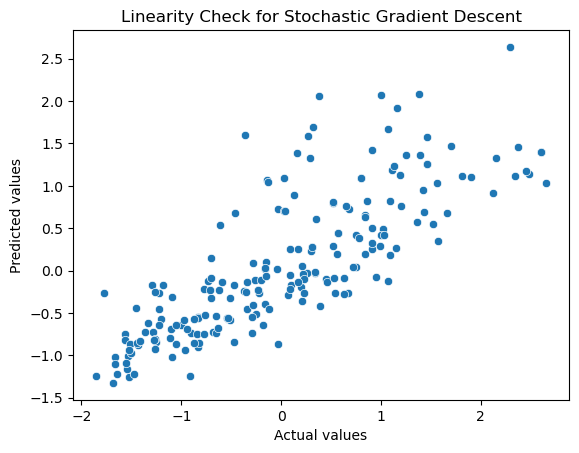

In [67]:
y_predict_SD = y_predict_SD.flatten()
sns.scatterplot(x=y_test_array, y=y_predict_SD)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linearity Check for Stochastic Gradient Descent')
plt.show()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multicollinearity using VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_result = calculate_vif(X_train)
print(vif_result)

   Variable       VIF
0         0  7.644086
1         1  7.235214
2         2  6.392108
3         3  6.873809
4         4  2.857404
5         5  5.105054
6         6  6.765928
7         7  1.102819


In [59]:
residuals = y_test_array - y_pred_LR_array
durbin_watson_stat = sm.stats.stattools.durbin_watson(a.resid)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')

Durbin-Watson Statistic: 2.0683480963845815


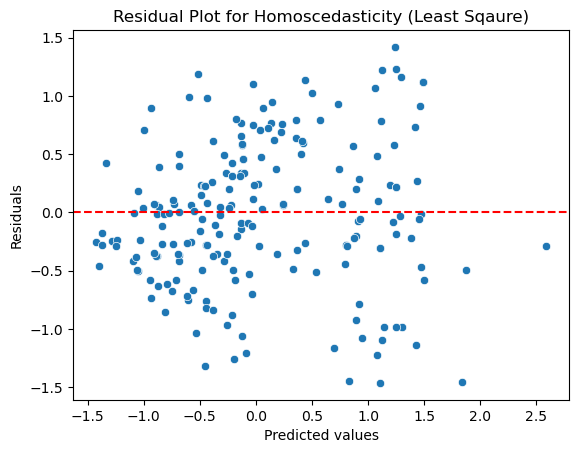

In [68]:
# Check homoscedasticity using residual plot
sns.scatterplot(x=y_pred_LR_array, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity (Least Sqaure)')
plt.show()

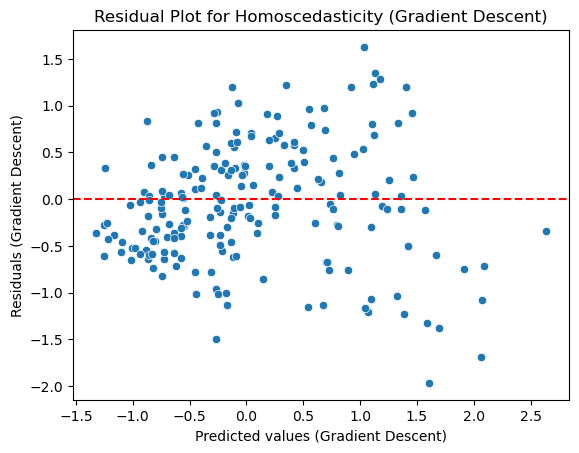

In [64]:
# Residual Plot for Homoscedasticity (Gradient Descent Algorithm)
residuals_gd = y_test_array - y_predict_SD
sns.scatterplot(x=y_predict_SD, y=residuals_gd)
plt.xlabel('Predicted values (Gradient Descent)')
plt.ylabel('Residuals (Gradient Descent)')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity (Gradient Descent)')
plt.show()
